### 13_ImageDataGenerator_URLimdb
from keras.preprocessing.image import load_img, img_to_array, array_to_img, save_img, ImageDataGenerator  
from keras.preprocessing.text import text_to_word_sequence, Tokenizer  
words = text_to_word_sequence(doc, lower=False, split=",")  
words = Tokenizer().fit_on_texts(docs)  
result = urllib.request.urlretrieve(url, file_path)   
permu_array = np.random.permutation(length)  

In [1]:
import os, sys, re
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, UpSampling2D
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, save_img, ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request
import tarfile

In [2]:
# 定義文件
doc = "Keras is an API designed for human beings, not machines."
# 將文件分割成單字
words = text_to_word_sequence(doc)
print(words)

['keras', 'is', 'an', 'api', 'designed', 'for', 'human', 'beings', 'not', 'machines']


In [3]:
# 定義文件
doc = "Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Outcome"
# 將文件分割成單字
words = text_to_word_sequence(doc, lower=False, split=",")
print(words)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Outcome']


In [6]:
# 定義文件
doc = "This is a book. That is a pen."
words_origin = text_to_word_sequence(doc)
words = set(words_origin)
vocab_size = len(words)
print(words_origin)
print(words)

['this', 'is', 'a', 'book', 'that', 'is', 'a', 'pen']
{'is', 'this', 'that', 'pen', 'book', 'a'}


In [12]:
# 定義 3 份文件
docs = ["Keras is an API designed for human beings, not machines.",
        "Easy to learn and easy to use." ,
        "Keras makes it easy to turn models into products."]
# 建立 Tokenizer
tok = Tokenizer()
# 執行文字資料預處理
tok.fit_on_texts(docs)
# 顯示摘要資訊
print(tok.document_count)
print(tok.word_counts)
print()
print(tok.word_index)
print()
print(tok.word_docs)
print()
print(tok.texts_to_sequences(docs))

3
OrderedDict([('keras', 2), ('is', 1), ('an', 1), ('api', 1), ('designed', 1), ('for', 1), ('human', 1), ('beings', 1), ('not', 1), ('machines', 1), ('easy', 3), ('to', 3), ('learn', 1), ('and', 1), ('use', 1), ('makes', 1), ('it', 1), ('turn', 1), ('models', 1), ('into', 1), ('products', 1)])

{'easy': 1, 'to': 2, 'keras': 3, 'is': 4, 'an': 5, 'api': 6, 'designed': 7, 'for': 8, 'human': 9, 'beings': 10, 'not': 11, 'machines': 12, 'learn': 13, 'and': 14, 'use': 15, 'makes': 16, 'it': 17, 'turn': 18, 'models': 19, 'into': 20, 'products': 21}

defaultdict(<class 'int'>, {'beings': 1, 'machines': 1, 'is': 1, 'not': 1, 'keras': 2, 'an': 1, 'designed': 1, 'human': 1, 'for': 1, 'api': 1, 'learn': 1, 'easy': 2, 'and': 1, 'use': 1, 'to': 2, 'makes': 1, 'products': 1, 'turn': 1, 'into': 1, 'models': 1, 'it': 1})

[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1, 2, 13, 14, 1, 2, 15], [3, 16, 17, 1, 2, 18, 19, 20, 21]]


In [11]:
# 定義 3 份文件
docs = ["Keras is an API designed for human beings, not machines.",
        "Easy to learn and easy to use." ,
        "Keras makes it easy to turn models into products."]
# 建立 Tokenizer
tok = Tokenizer()
# 執行文字資料預處理
tok.fit_on_texts(docs)
# 建立序列資料


[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1, 2, 13, 14, 1, 2, 15], [3, 16, 17, 1, 2, 18, 19, 20, 21]]


# 下載 IMDb資料

In [50]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/"
filename ="aclImdb_v1.tar.gz"
# IMDb資料所在目錄
path = "./Data/aclImdb/"
os.makedirs(path, exist_ok=True)
if not os.path.isfile("./Data/"+filename):
    print("Downloading",filename)
    result = urllib.request.urlretrieve(url+filename, "./Data/"+filename)   
    print('downloaded:',result)
else:
    print(filename, "Exists")
# 解壓縮 ，還無法指定解壓縮到哪的資料夾
if not os.path.isdir(path+"train"):
#     tar = tarfile.open("./Data/"+filename, "r:gz")
#     tar.extractall()
    print("Unziped", filename)
else:
    print("Unzip Data Exsits")

aclImdb_v1.tar.gz Exists
Unzip Data Exsits


In [53]:
# 建立檔案清單
fList = [path + "train/pos/" + x for x in os.listdir(path + "train/pos")] + \
        [path + "train/neg/" + x for x in os.listdir(path + "train/neg")] + \
        [path + "test/pos/" + x for x in os.listdir(path + "test/pos")] + \
        [path + "test/neg/" + x for x in os.listdir(path + "test/neg")]

# 刪除HTML標籤的符號
def remove_tags(text):
    TAG = re.compile(r'<[^>]+>')
    return TAG.sub('', text)
# 讀取文字檔案的資料    
input_label = ([1] * 12500 + [0] * 12500) * 2 #pos 12500, neg 12500 ; *2 -> train test
input_text  = []
# 讀取檔案內容
for fname in fList:
    with open(fname, encoding="utf8") as ff:
        input_text += [remove_tags(" ".join(ff.readlines()))]
print(input_text[5])
print(input_label[5])
# 將文件分割成單字, 建立詞索引字典       
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(input_text[:25000])
print("文件數: ", tok.document_count)
print({k: tok.word_index[k] for k in list(tok.word_index)[:10]})
# 建立訓練和測試資料集
X_train = tok.texts_to_sequences(input_text[:25000])
X_test  = tok.texts_to_sequences(input_text[25000:])
Y_train = input_label[:25000]
Y_test  = input_label[25000:]
# 將序列資料填充成相同長度
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test  = sequence.pad_sequences(X_test,  maxlen=100)
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.I must say that I was highly entertained, though this movie fails to teach, guide, inspect, or amuse. It felt more like I was watching a guy (Williams), as he was actually performing the actions, from a third person perspective. In other words, it felt real, and I was able to subscribe to the premise of the story.All in all, it's worth a watch, though it's definitely not Friday/Saturday night fare.It rates a 7.7/10 from...the Fiend :.
1
文件數:  25000
{'the': 1, 'and': 2, 'a': 3,

In [59]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
# 定義模型
model = Sequential()
model.add(Embedding(2000, 32, input_length=100))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=128, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
model.save("Imdb.h5")
print("Imdb.h5 saved")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               819456    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 883,713
Trainable params: 883,713
Non-trainable params: 0
________________________________________________

In [85]:
a = model.predict(X_train[1:2])
print(a)
a = model.predict(X_train[100:101])
print(a)

[[0.7280342]]
[[0.9346325]]


# 圖片風格轉換

In [100]:
img = load_img("penguins.png")
# 顯示圖片資訊
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
RGB
(505, 763)


<class 'PIL.Image.Image'> <class 'PIL.Image.Image'>
dtype float32 float32
shape (763, 505, 3) (227, 227, 1)


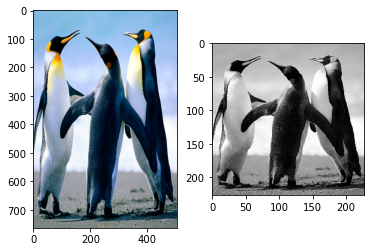

In [103]:
# 轉換成 Numpy 陣列
img_array = img_to_array(img)
img2 = array_to_img(img_array)
plt.subplot(1,2,1)
plt.imshow(img2)

# RGB轉灰階 ; 轉尺寸 
img3 = load_img("penguins.png", grayscale=True, target_size=(227,227))
img_array2 = img_to_array(img3)
img3 = array_to_img(img_array2)
print(type(img2), type(img3))
print("dtype", img_array.dtype, img_array2.dtype)
print("shape", img_array.shape, img_array2.shape)
plt.subplot(1,2,2)
plt.imshow(img3, cmap="gray")
plt.show()

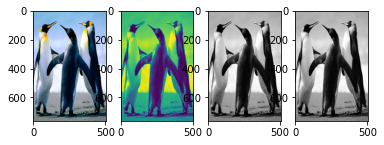

In [114]:
img_o = load_img("penguins.png")
img = load_img("penguins.png", grayscale=True)
img_array = img_to_array(img)
save_img("penguins_grayscale.jpg", img_array)
img2 = load_img("penguins_grayscale.jpg")
plt.subplot(1,4,1)
plt.imshow(img_o)
plt.subplot(1,4,2)
plt.imshow(img_array)
plt.subplot(1,4,3)
plt.imshow(img_array, cmap="gray")
plt.subplot(1,4,4)
plt.imshow(img2)

(1, 707, 505, 3)


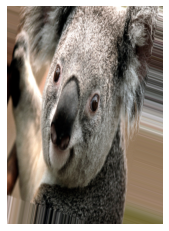

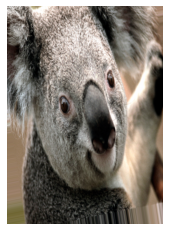

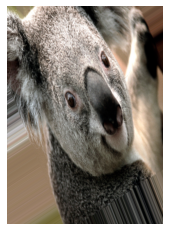

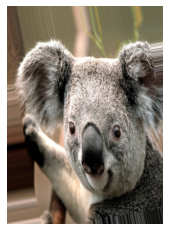

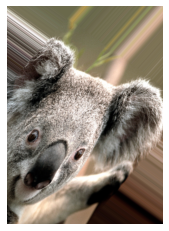

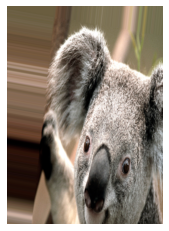

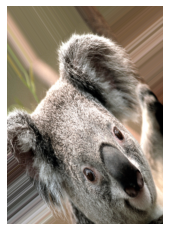

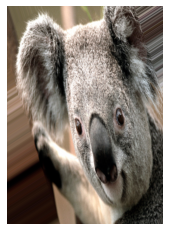

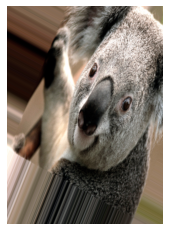

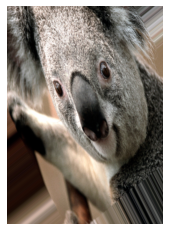

In [122]:
os.makedirs("preview", exist_ok=True)
img = load_img("koala.png")
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  # reshape (1, hight, width, 3)
print(x.shape)

datagen = ImageDataGenerator(
           rotation_range=40,
           width_shift_range=0.2,
           height_shift_range=0.2,
           shear_range=0.2,
           zoom_range=0.2,
           horizontal_flip=True)
i = 0
for batch_img in datagen.flow(x, batch_size=1,
                              save_to_dir="preview", 
                              save_prefix="pen",
                              save_format="jpeg"):
    plt.axis("off")
    plt.imshow(batch_img[0].astype("int"))
    plt.show()
    i += 1
    if i >= 10:
        break 

(1, 707, 505, 3)


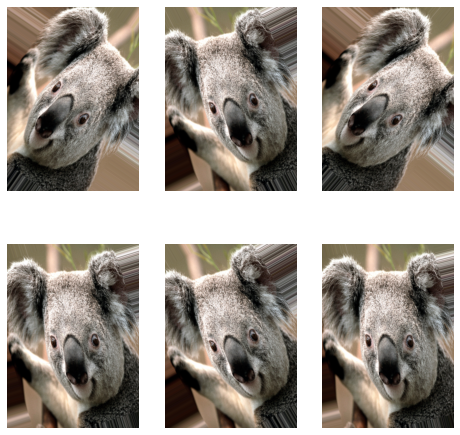

In [123]:
img = load_img("koala.png") 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # reshape (1, hight, width, 3)
print(x.shape)

datagen = ImageDataGenerator(rotation_range=40) #最多選轉 40度

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

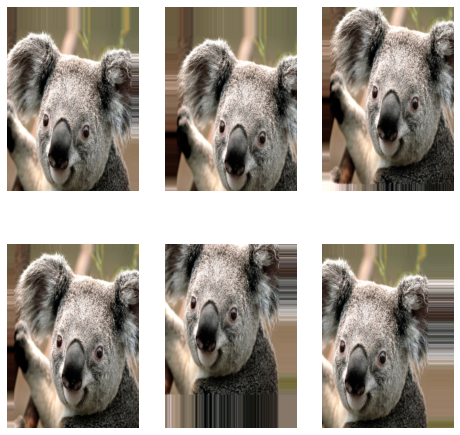

In [124]:
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2) # 水平 和垂直 最多 位移 20%
numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()
 

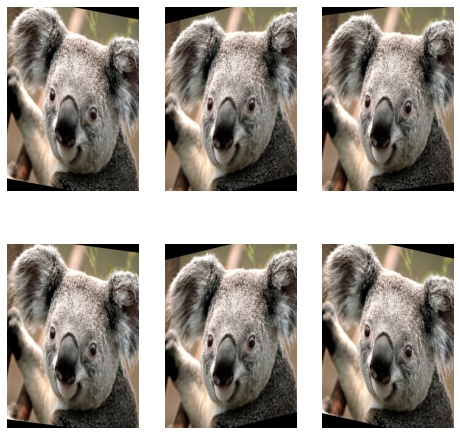

In [125]:
datagen = ImageDataGenerator(shear_range=15,
                             fill_mode="constant") # 推移變換強度

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

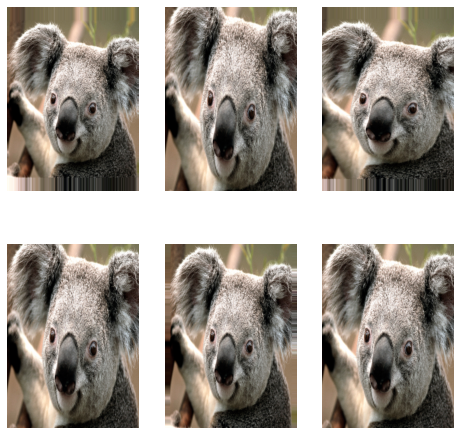

In [126]:
datagen = ImageDataGenerator(zoom_range=0.2) # 數值縮放範圍

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

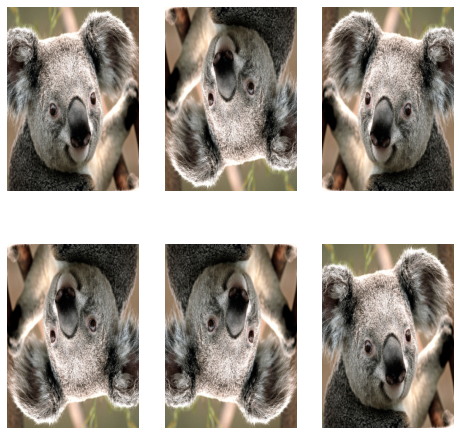

In [127]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True) # 是否 水平 垂直 翻轉

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

In [136]:
# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
# 取出前 20% 的訓練資料
X_train_part = X_train[:10000]
Y_train_part = Y_train[:10000]
print("shape", X_train_part.shape, Y_train_part.shape)
# 顯示每一種類別有幾筆資料
unique, counts = np.unique(Y_train_part, return_counts=True)
count_dict = dict(zip(unique, counts))
print("count_dict", count_dict)
total = 0
for i in count_dict.values():
    print(i,' + ',end='')
    total += i
print("=",total)

shape (10000, 32, 32, 3) (10000, 1)
count_dict {0: 1024, 1: 1008, 2: 999, 3: 1023, 4: 1004, 5: 978, 6: 993, 7: 999, 8: 986, 9: 986}
1024  + 1008  + 999  + 1023  + 1004  + 978  + 993  + 999  + 986  + 986  + = 10000


In [137]:
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 取出20%訓練, 10%驗證
X_train_part = X_train[:10000]
Y_train_part = Y_train[:10000]
print(X_train_part.shape, Y_train_part.shape)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])


(10000, 32, 32, 3) (10000, 10)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)        

In [138]:
# 訓練模型
history = model.fit(X_train_part, Y_train_part, 
                    validation_data=(X_test, Y_test), 
                    epochs=3, batch_size=32, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Train on 10000 samples, validate on 10000 samples
Epoch 1/3
10000/10000 - 14s - loss: 1.9028 - accuracy: 0.2957 - val_loss: 1.5608 - val_accuracy: 0.4461
Epoch 2/3
10000/10000 - 13s - loss: 1.5584 - accuracy: 0.4354 - val_loss: 1.4115 - val_accuracy: 0.4858
Epoch 3/3
10000/10000 - 13s - loss: 1.4244 - accuracy: 0.4879 - val_loss: 1.3055 - val_accuracy: 0.5268

Testing ...
測試資料集的準確度 = 0.53


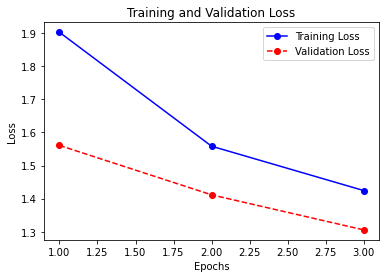

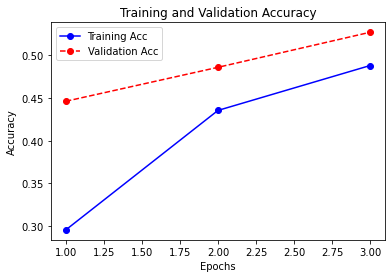

In [139]:
# 顯示圖表來分析模型的訓練過程
# 顯示訓練和驗證損失
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(10000, 32, 32, 3) (10000, 10)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_8 (Dense)        

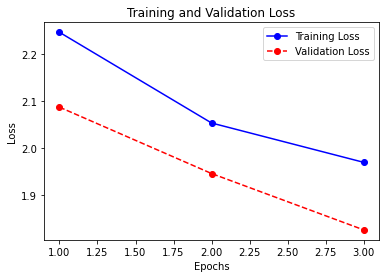

KeyError: 'val_accuraccy'

In [141]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 取出20%訓練, 10%驗證
X_train_part = X_train[:10000]
Y_train_part = Y_train[:10000]
print(X_train_part.shape, Y_train_part.shape)
# 資料預處理
train_datagen = ImageDataGenerator(
           rescale=1. / 255,
           width_shift_range=0.1,
           height_shift_range=0.1,
           shear_range=0.1,
           zoom_range=0.1,
           horizontal_flip=True)

train_generator = train_datagen.flow(
             X_train_part, Y_train_part,
             batch_size=16)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit_generator(
          train_generator,
          steps_per_epoch=100,
          epochs=3, verbose=2,
          validation_data=(X_test, Y_test))
# steps_per_epoch = 10000,  epochs=14
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


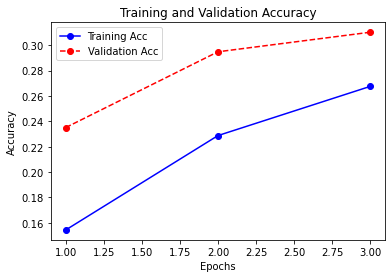

cifar10.h5 saved


In [142]:
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
model.save(os.path.join(".","model_data","cifar10_13.h5"))
print("cifar10.h5 saved")